In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
df_labeled = pd.read_csv("/Users/hetavpatel/Desktop/Data Science/Grad DS Work/DSCI 601 Applied Data Science/old_repos/NLPPunePorsche/LLMsTM/openCodingCommentsLabeled.csv")

In [13]:
df_labeled["Label"].value_counts()

Label
6    557
1    148
5    140
3     77
7     42
4     22
2     14
Name: count, dtype: int64

/var/folders/xr/0vdqp3k12gn7yn75q4893hsm0000gn/T/ipykernel_74022/2345370311.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Label", data=df_labeled, palette="cubehelix")


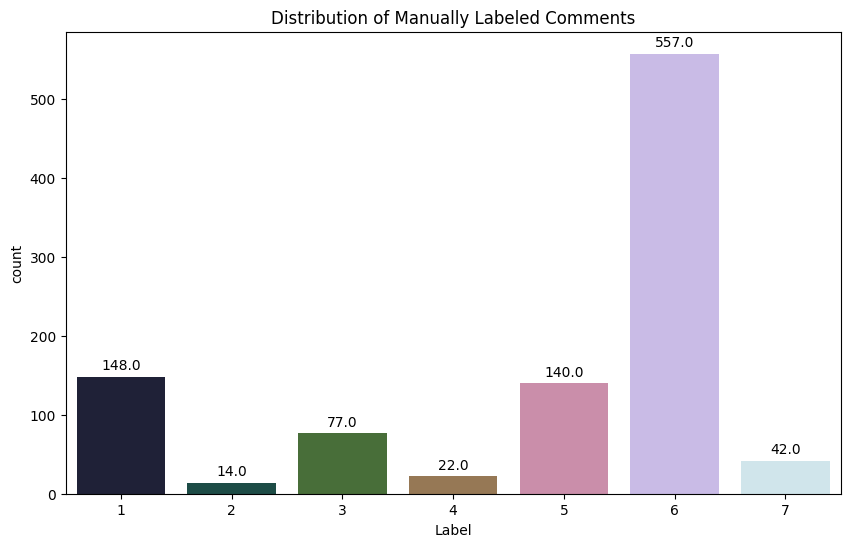

In [14]:
# Plot the distribution of the manually labels comments using seaborn 
plt.figure(figsize=(10, 6))
sns.countplot(x="Label", data=df_labeled, palette="cubehelix")
plt.title("Distribution of Manually Labeled Comments")
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

In [15]:
# each bar shows the major topic of the comment that the commenter wrote in the video.
# The labels are:
# 1 - "Judicial Accountability and Policy Demands"
# 2 - "Public Safety"
# 3 - "Socioeconomic Privilege"
# 4 - "Victim Sympathy"
# 5 - "Anger or Outrage"
# 6 - "Irrelevant/General Comments"
# 7 - "Views on Similar Cases in the Past"

In [16]:
#make another column with the textual description of the label
def label_to_text(label):
    if label == 1 or label == 1.0:
        return "Judicial Accountability and Policy Demands"
    elif label == 2 or label == 2.0:
        return "Public Safety"
    elif label == 3 or label == 3.0:
        return "Socioeconomic Privilege"
    elif label == 4 or label == 4.0:
        return "Victim Sympathy"
    elif label == 5 or label == 5.0:
        return "Anger or Outrage"
    elif label == 6 or label == 6.0:
        return "Irrelevant/General Comments"
    elif label == 7 or label == 7.0:
        return "Views on Similar Cases in the Past"
    
df_labeled["Label_Topic"] = df_labeled["Label"].apply(label_to_text)

/var/folders/xr/0vdqp3k12gn7yn75q4893hsm0000gn/T/ipykernel_74022/48290185.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Label_Topic", data=df_labeled, palette="cubehelix")


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Irrelevant/General Comments'),
  Text(1, 0, 'Socioeconomic Privilege'),
  Text(2, 0, 'Judicial Accountability and Policy Demands'),
  Text(3, 0, 'Anger or Outrage'),
  Text(4, 0, 'Victim Sympathy'),
  Text(5, 0, 'Public Safety'),
  Text(6, 0, 'Views on Similar Cases in the Past')])

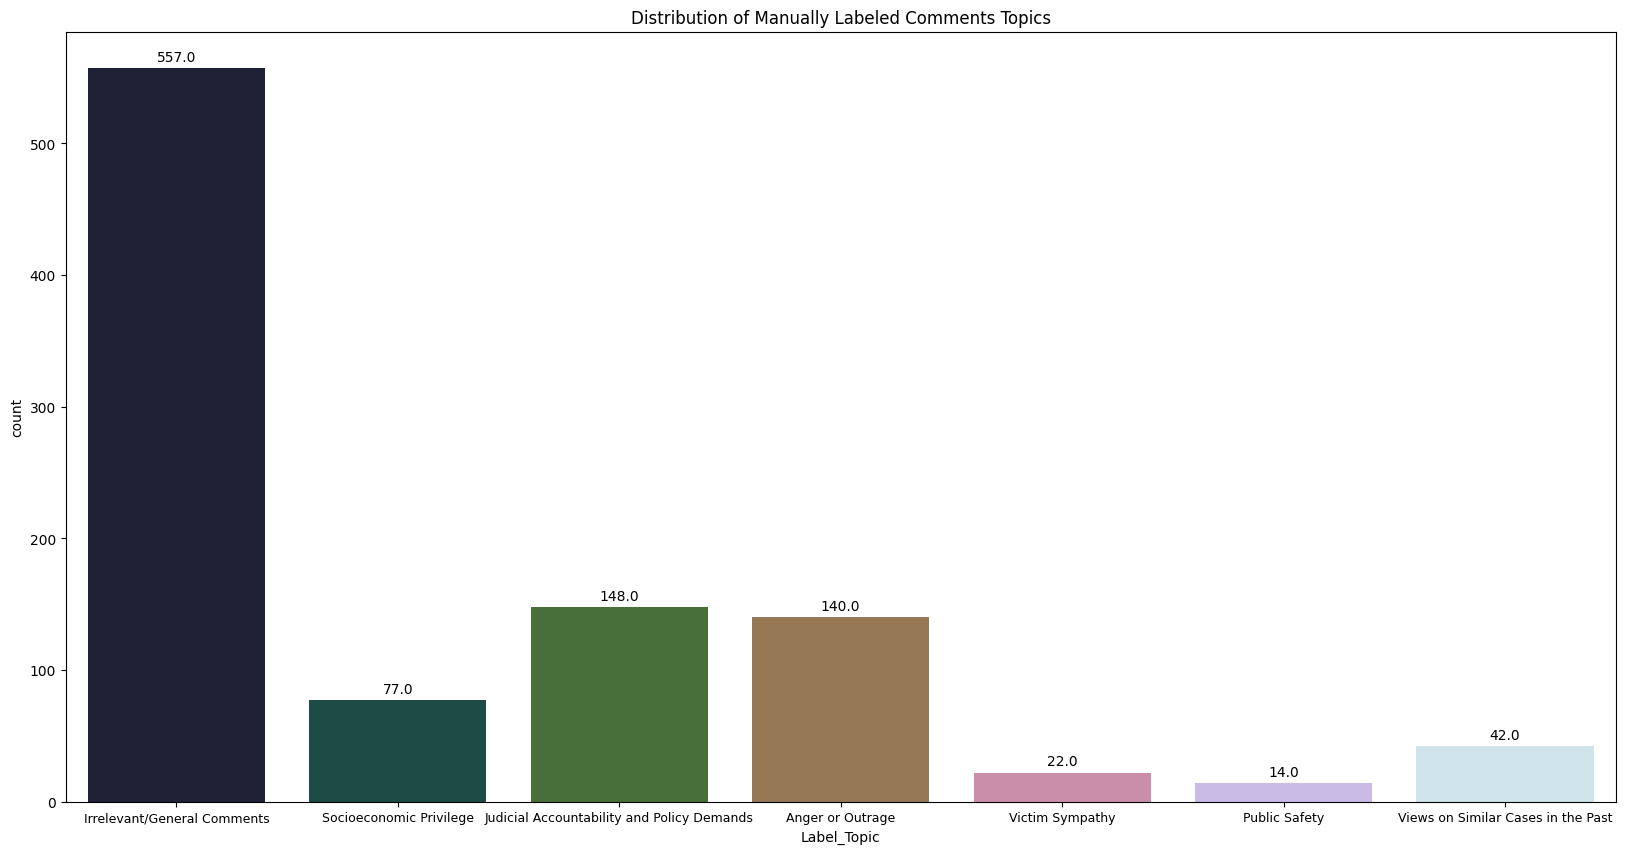

In [17]:
#now plot the distribution of the manually labeled comments topics using seaborn
plt.figure(figsize=(20, 10))
sns.countplot(x="Label_Topic", data=df_labeled, palette="cubehelix")
plt.title("Distribution of Manually Labeled Comments Topics")
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
    
#the text of the x_axs is overlapping each other, so reduce it's font size or do something else so that each column is clear, you can increase the cahart size too
plt.xticks(fontsize=9)
    

In [18]:
df_sample_phi3_trial = pd.read_csv("/Users/hetavpatel/Desktop/Data Science/Grad DS Work/DSCI 601 Applied Data Science/old_repos/NLPPunePorsche/openCoding/youtube_comments_unlabeled.csv")

#take a sample of 10000 comments from the df_sample_phi3_trial dataframe which have lang = en
df_sample_phi3_trial = df_sample_phi3_trial[df_sample_phi3_trial["lang"] == "en"]
df_sample_phi3_trial = df_sample_phi3_trial.sample(n=10000, random_state=42)

#save the sample to a csv file
df_sample_phi3_trial.to_csv("/Users/hetavpatel/Desktop/Data Science/Grad DS Work/DSCI 601 Applied Data Science/old_repos/NLPPunePorsche/LLMsTM/unlabeled_sampled.csv", index=False)

In [19]:
df_sample = pd.read_csv("/Users/hetavpatel/Desktop/Data Science/Grad DS Work/DSCI 601 Applied Data Science/old_repos/NLPPunePorsche/LLMsTM/labeled_sampled.csv")

#only choose the first 100 rows from the df_sample dataframe
df_sample = df_sample.iloc[:150, :]
#make a csv file with the comments i.e the column "textCleaned" and the labels i.e. the column "label" from the df_sample dataframe
df_sample = df_sample[["textCleaned", "label"]]
#apply label_to_text function to the label column of the df_sample dataframe and save it to a new column "label_text"
df_sample["Label_Topic"] = df_sample["label"].apply(label_to_text)

df_sample.to_csv("/Users/hetavpatel/Desktop/Data Science/Grad DS Work/DSCI 601 Applied Data Science/old_repos/NLPPunePorsche/LLMsTM/labeled_sampled_output.csv", index=False)


/var/folders/xr/0vdqp3k12gn7yn75q4893hsm0000gn/T/ipykernel_74022/1906672088.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Label_Topic", data=df_sample, palette="cubehelix")


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Public Safety'),
  Text(1, 0, 'Anger or Outrage'),
  Text(2, 0, 'Irrelevant/General Comments'),
  Text(3, 0, 'Victim Sympathy'),
  Text(4, 0, 'Socioeconomic Privilege'),
  Text(5, 0, 'Judicial Accountability and Policy Demands'),
  Text(6, 0, 'Views on Similar Cases in the Past')])

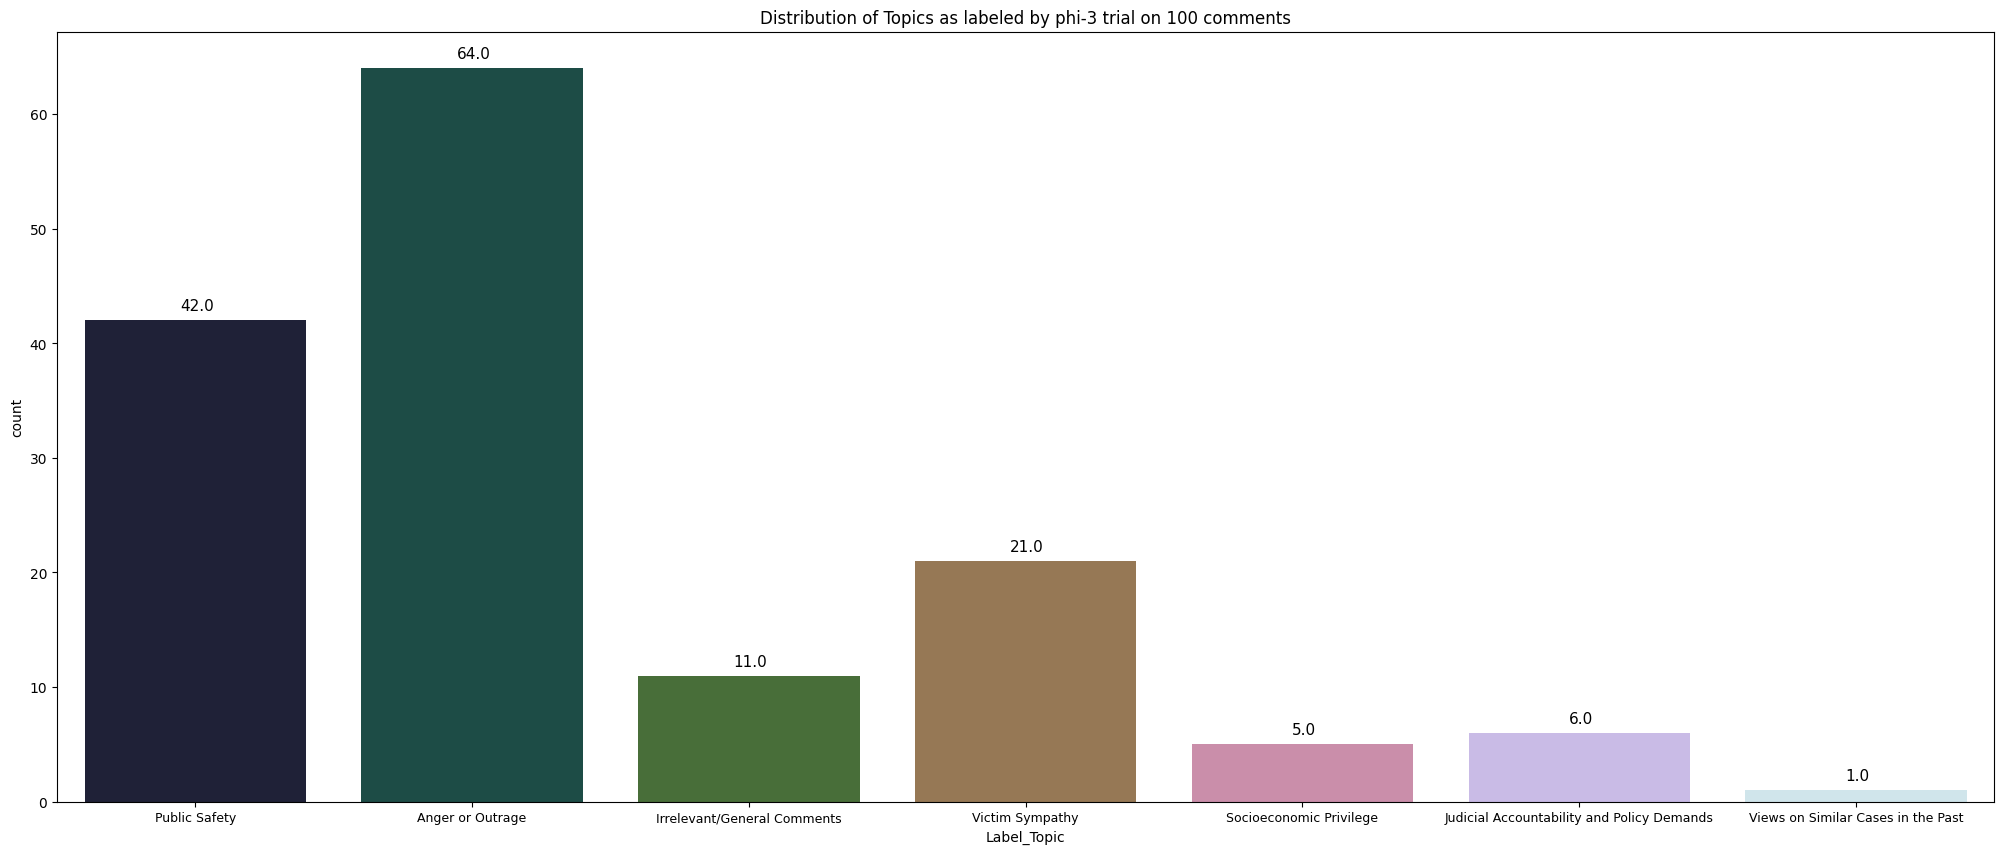

In [23]:
#now plot the distribution of the manually labeled comments topics using seaborn
plt.figure(figsize=(25, 10))
sns.countplot(x="Label_Topic", data=df_sample, palette="cubehelix")
plt.title("Distribution of Topics as labeled by phi-3 trial on 100 comments")
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=11, color='black', xytext=(1, 7), textcoords='offset points')
    
#the text of the x_axs is overlapping each other, so reduce it's font size or do something else so that each column is clear, you can increase the cahart size too
plt.xticks(fontsize=9)